In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

In [2]:
# a. Loading and preprocessing the image data
train_data = pd.read_csv('mnist_train.csv')
test_data = pd.read_csv('mnist_test.csv')

In [3]:
# Extracting features and labels
train_images = train_data.iloc[:, 1:].values.reshape(-1, 28, 28, 1) / 255.0
train_labels = train_data.iloc[:, 0].values

In [4]:
test_images = test_data.iloc[:, 1:].values.reshape(-1, 28, 28, 1) / 255.0
test_labels = test_data.iloc[:, 0].values

In [5]:
test_images = test_data.iloc[:, 1:].values.reshape(-1, 28, 28, 1) / 255.0
test_labels = test_data.iloc[:, 0].values

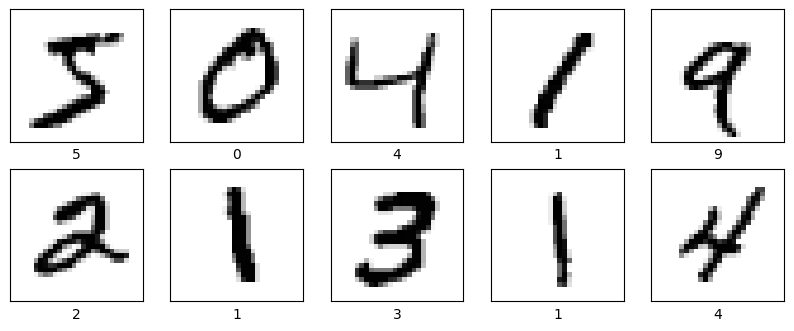

In [6]:
# Displaying the first 10 images with labels
class_names = [str(i) for i in range(10)]

plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [7]:
# b. Defining the model's architecture
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)              

In [8]:
# c. Training the model
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])


In [9]:
# d. Estimating the model's performance
epochs = 10
history = model.fit(train_images, train_labels, epochs=epochs, validation_data=(test_images, test_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/10


c:\users\saura\appdata\local\programs\python\python39\lib\site-packages\keras\src\backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(




1875/1875 [==============================] - 66s 33ms/step - loss: 0.1440 - accuracy: 0.9556 - val_loss: 0.0503 - val_accuracy: 0.9844
Epoch 2/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0476 - accuracy: 0.9849 - val_loss: 0.0341 - val_accuracy: 0.9899
Epoch 3/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0341 - accuracy: 0.9885 - val_loss: 0.0281 - val_accuracy: 0.9913
Epoch 4/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0264 - accuracy: 0.9916 - val_loss: 0.0263 - val_accuracy: 0.9910
Epoch 5/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0202 - accuracy: 0.9936 - val_loss: 0.0261 - val_accuracy: 0.9914
Epoch 6/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0160 - accuracy: 0.9948 - val_loss: 0.0319 - val_accuracy: 0.9905
Epoch 7/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0133 - accuracy: 0.9954 - val_loss: 0.0320 - val_accu

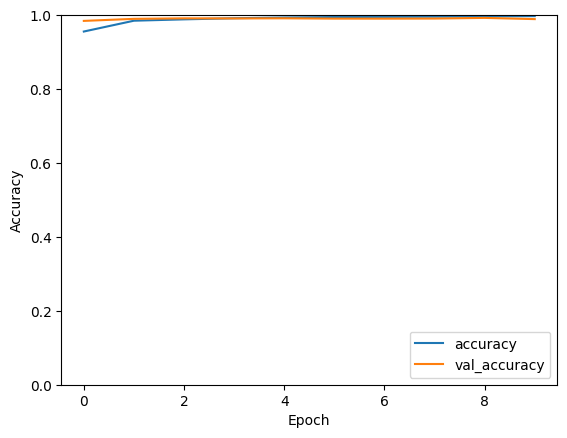

In [11]:
# Plotting the training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()